In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
movie_summary = pd.read_json("/content/drive/MyDrive/Fall2023DataAndMedia/IMDB_movie_details.json", lines = True)
print(movie_summary.shape)
movie_summary.head()

(1572, 7)


,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [ ]:
movie_review = pd.read_json("/content/drive/MyDrive/Fall2023DataAndMedia/IMDB_reviews.json", lines = True)
movie_review["review_date"] = pd.to_datetime(movie_review["review_date"], format="%d %B %Y")

# Filter entries within the specified date range
movie_review = movie_review[
    (movie_review["review_date"] >= "2010-01-01") & (movie_review["review_date"] <= "2019-12-31")
]
print(movie_review.shape)
movie_review.head()

(275795, 7)


,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
7,2012-02-04,tt0111161,ur31182745,True,I made my account on IMDb Just to Rate this mo...,10,Movie you can see 1000 times
9,2011-07-30,tt0111161,ur2707735,True,Well I guess I'm a little late to the party as...,10,"""I'm a convicted murderer who provides sound f..."
11,2010-06-01,tt0111161,ur23169472,True,"To tell the truth, I am speechless. I am a you...",10,"Blatantly Simple, yet Utterly Beautiful"
13,2013-07-16,tt0111161,ur34426359,True,Wow! what a film this baby is and yes this fil...,10,Great films come only once in a blue moon
14,2013-07-02,tt0111161,ur30748387,True,"In 1947, banker Andy Dufresne (Tim Robbins) is...",10,Yes...


In [ ]:
import re  # Regular expressions library for advanced text cleaning

# Function to clean text
def clean_text(text):
    # Lowercase text
    text = text.lower()

    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

# Apply the cleaning function to the desired column
movie_review["review_text"] =  movie_review["review_text"].apply(clean_text)

movie_review['length'] = movie_review["review_text"].str.len()
spoiler_lengths = movie_review.groupby("is_spoiler")["length"].describe()
print(spoiler_lengths)

              count         mean          std   min    25%     50%     75%  \
is_spoiler                                                                   
False       85761.0  1427.076771  1071.441467  10.0  715.0  1012.0  1752.0   
True        42156.0  1842.930117  1267.779048   4.0  877.0  1417.0  2416.0   

               max  
is_spoiler          
False       6558.0  
True        7996.0  


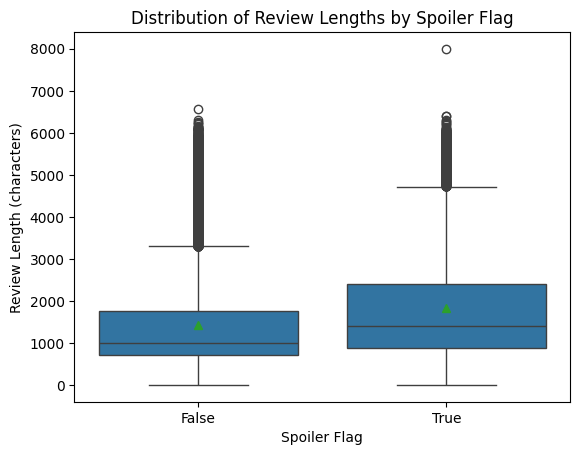

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="is_spoiler", y="length", showmeans=True, data= movie_review)
plt.xlabel("Spoiler Flag")
plt.ylabel("Review Length (characters)")
plt.title("Distribution of Review Lengths by Spoiler Flag")
plt.show()

<ipython-input-7-40a1cc3297a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_review[movie_review['is_spoiler'] == False]['length'], hist=False, label='Without spoilers')
<ipython-input-7-40a1cc3297a9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_review[movie_

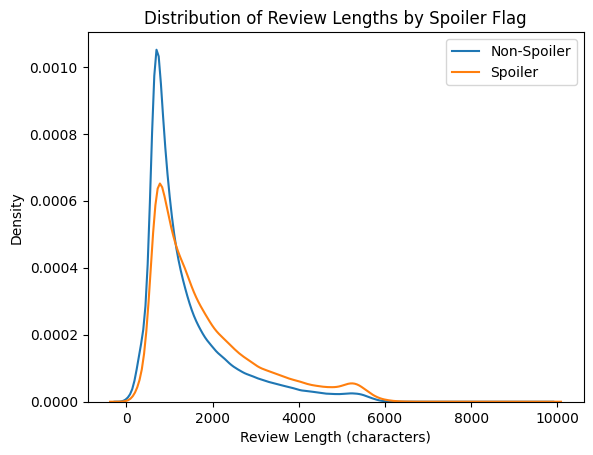

In [ ]:
# To separate by Spoiler Flag:
sns.distplot(movie_review[movie_review['is_spoiler'] == False]['length'], hist=False, label='Without spoilers')
sns.distplot(movie_review[movie_review['is_spoiler'] == True]['length'], hist=False, label='Containing spoilers')
plt.xlabel("Review Length (characters)")
plt.ylabel("Density")
plt.title("Distribution of Review Lengths by Spoiler Flag")
plt.legend(["Non-Spoiler", "Spoiler"])
plt.show()

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK resources (if not already done)
nltk.download('vader_lexicon')

# Create a sentiment analyzer object
analyzer = SentimentIntensityAnalyzer()

# Create a new column for compound scores
movie_review["compound_score"] = None  # Initialize with empty values

# Iterate through reviews and calculate scores
for index, row in movie_review.iterrows():
    review_text = row["review_text"]  # Assuming review text column name is "review_text"
    scores = analyzer.polarity_scores(review_text)
    compound_score = scores["compound"]

    # Update the corresponding value in the DataFrame
    movie_review.loc[index, "compound_score"] = compound_score

# Now the DataFrame has the sentiment scores appended
print(movie_review)

# You can access the compound scores directly:
compound_scores = movie_review["compound_score"]
print(compound_scores)

# Or perform further analysis on the DataFrame with scores


NameError: name 'nltk' is not defined

In [ ]:
movie_review["review_date"] = pd.to_datetime(movie_review["review_date"], format="%d %B %Y")

# Filter entries within the specified date range
movie_review = movie_review[
    (movie_review["review_date"] >= "2010-01-01") & (movie_review["review_date"] <= "2019-12-31")
]

movie_review.to_csv("output_file.csv", index=False)  # Basic export

In [ ]:
movie_review = pd.read_csv("/content/drive/MyDrive/Fall2023DataAndMedia/output_file.csv")
movie_review = movie_review.dropna()
movie_review.head()


<ipython-input-11-4a4207733979>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_review = pd.read_csv("/content/drive/MyDrive/Fall2023DataAndMedia/output_file.csv")


,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,length,compound_score
0,2012-02-04,tt0111161,ur31182745,True,i made my account on imdb just to rate this mo...,10.0,Movie you can see 1000 times,852.0,0.9884
1,2011-07-30,tt0111161,ur2707735,True,well i guess im a little late to the party as ...,10.0,"""I'm a convicted murderer who provides sound f...",2779.0,0.9871
2,2010-06-01,tt0111161,ur23169472,True,to tell the truth i am speechless i am a young...,10.0,"Blatantly Simple, yet Utterly Beautiful",942.0,0.8223
3,2013-07-16,tt0111161,ur34426359,True,wow what a film this baby is and yes this film...,10.0,Great films come only once in a blue moon,653.0,0.9915
4,2013-07-02,tt0111161,ur30748387,True,in 1947 banker andy dufresne tim robbins is co...,10.0,Yes...,4170.0,-0.9982


In [ ]:
movie_review['length'] = movie_review["review_text"].str.len()
movie_review.shape

<ipython-input-12-ffec1fcf5fc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_review['length'] = movie_review["review_text"].str.len()


(127917, 9)

In [ ]:
spoiler_scores = movie_review[movie_review["is_spoiler"] == True]["compound_score"]
non_spoiler_scores = movie_review[movie_review["is_spoiler"] == False]["compound_score"]

# Create a new DataFrame with summary statistics
summary_df = pd.DataFrame({
    "Spoiler": spoiler_scores.describe(),
    "Non-Spoiler": non_spoiler_scores.describe()
})

summary_df

,Spoiler,Non-Spoiler
count,42156.000000,85761.000000
mean,0.414043,0.591192
std,0.792628,0.673365
min,-0.999800,-0.999800
25%,-0.421500,0.605700
50%,0.931400,0.958500
75%,0.987600,0.989100
max,0.999900,1.000000


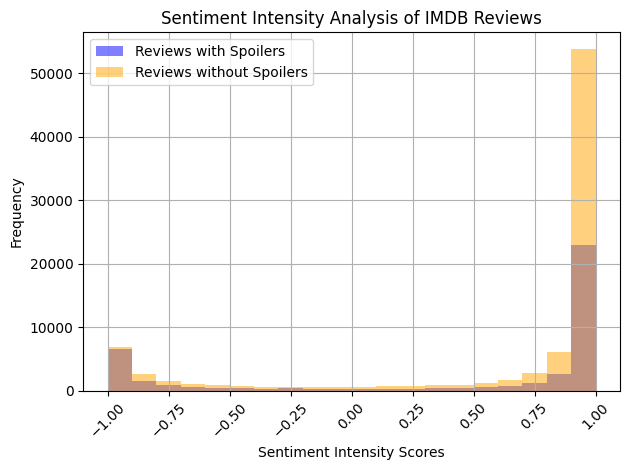

In [ ]:
plt.hist(spoiler_scores, alpha=0.5, label="Reviews with Spoilers", bins=20, color="blue")
plt.hist(non_spoiler_scores, alpha=0.5, label="Reviews without Spoilers", bins=20, color="orange")

# Add labels and title
plt.xlabel("Sentiment Intensity Scores")
plt.ylabel("Frequency")
plt.title("Sentiment Intensity Analysis of IMDB Reviews")

# Add legend
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout for aesthetics
plt.show()

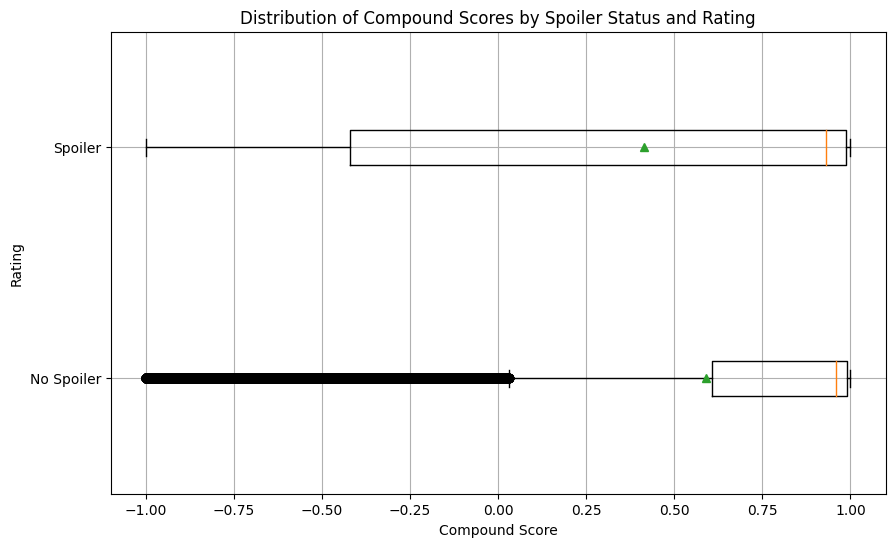

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have loaded your DataFrame 'movie_review'

# Create the boxplot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Separate data based on 'is_spoiler'
no_spoiler_data = movie_review[movie_review["is_spoiler"] == False]
spoiler_data = movie_review[movie_review["is_spoiler"] == True]

# Create the boxplots
plt.boxplot([no_spoiler_data["compound_score"], spoiler_data["compound_score"]],
            labels=["No Spoiler", "Spoiler"],
            showmeans=True,  # Display mean markers
            vert=False)  # Horizontal orientation for better readability

# Customize plot elements
plt.xlabel("Compound Score")
plt.ylabel("Rating")
plt.title("Distribution of Compound Scores by Spoiler Status and Rating")
plt.grid(True)

# Display the plot
plt.show()


                is_spoiler    rating  compound_score
is_spoiler        1.000000 -0.075510       -0.115701
rating           -0.075510  1.000000        0.414092
compound_score   -0.115701  0.414092        1.000000


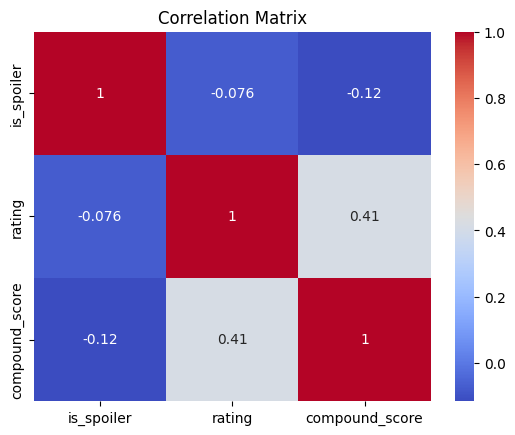

In [ ]:
movie_review['is_spoiler'] = movie_review['is_spoiler'].astype(int)
corr_matrix = movie_review[["is_spoiler", "rating","compound_score"]].corr()

# Display the correlation matrix as text
print(corr_matrix)

# Create a heatmap visualization of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from collections import Counter

# Assuming you have loaded your DataFrame 'df' and separated spoiler data

# Create separate dictionaries for word counts in each group
spoiler_word_counts = Counter()
non_spoiler_word_counts = Counter()

# Iterate through each review and update counters based on spoiler status
for i in range(len(movie_review)):
  is_spoiler = movie_review.loc[i, "is_spoiler"]
  text = movie_review.loc[i, "review_text"]

  # Preprocess text if needed (e.g., lowercase, remove punctuation)
  # ...

  # Split text into words and update counters
  for word in text.split():
    if is_spoiler:
      spoiler_word_counts[word] += 1
    else:
      non_spoiler_word_counts[word] += 1

# Analyze and present the results
# Option 1: Print top N most frequent words in each group
print("Top 10 most frequent words in spoiler reviews:")
for word, count in spoiler_word_counts.most_common(10):
  print(f"{word}: {count}")

print("Top 10 most frequent words in non-spoiler reviews:")
for word, count in non_spoiler_word_counts.most_common(10):
  print(f"{word}: {count}")

# Option 2: Create separate dataframes for further analysis
spoiler_word_df = pd.DataFrame.from_dict(spoiler_word_counts, orient = "index", columns=["Count"])
no_spoiler_word_df = pd.DataFrame.from_dict(non_spoiler_word_counts, orient = "index", columns=["Count"])



Top 10 most frequent words in spoiler reviews:
the: 854745
and: 417398
a: 370246
of: 351350
to: 349180
is: 263990
in: 223811
it: 184864
i: 183482
that: 182992
Top 10 most frequent words in non-spoiler reviews:
the: 1300633
and: 677827
a: 598268
of: 569395
to: 520487
is: 439334
in: 341937
it: 323635
i: 315135
that: 276197


In [ ]:
import nltk
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def is_adjective_or_verb(word, tag):
   return tag.startswith('J')

# Filter function to include only adjectives and verbs
def filter_adjectives_verbs(word_counts):
   filtered_word_counts = Counter()
   for word, count in word_counts.items():
       tokens = nltk.word_tokenize(word)  # Tokenize the word
       tags = nltk.pos_tag(tokens)  # Get the POS tags
       if all(is_adjective_or_verb(token, tag) for token, tag in tags):  # Check if all tokens are adjectives or verbs
           filtered_word_counts[word] = count
   return filtered_word_counts

# Apply the filtering function
filtered_spoiler_word_counts = filter_adjectives_verbs(spoiler_word_counts)
filtered_non_spoiler_word_counts = filter_adjectives_verbs(non_spoiler_word_counts)

print(filtered_spoiler_word_counts)
print(filtered_non_spoiler_word_counts)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Counter({'good': 33105, 'much': 24921, 'great': 24627, 'other': 22645, 'most': 21240, 'best': 19029, 'many': 17172, 'little': 13514, 'bad': 13344, 'such': 11852, 'new': 11309, 'real': 10765, 'same': 10599, 'few': 9118, 'own': 9104, 'whole': 8742, 'original': 8262, 'old': 8201, 'big': 7987, 'last': 7986, 'main': 7626, 'different': 7244, 'young': 6300, 'true': 6255, 'least': 5909, 'ive': 5772, 'hard': 5742, 'second': 5717, 'high': 5020, 'next': 4984, 'special': 4835, 'black': 4703, 'wrong': 4497, 'entire': 4423, 'final': 4314, 'full': 4030, 'overall': 3995, 'white': 3987, 'able': 3930, 'live': 3799, 'classic': 3697, 'nice': 3530, 'important': 3444, 'american': 3428, 'emotional': 3406, 'strong': 3383, 'short': 3257, 'small': 3169, 'dead': 3142, 'fantastic': 3041, 'comic': 3031, 'stupid': 2977, 'huge': 2864, 'worst': 2864, 'several': 2791, 'disappointed': 2680, 'happy': 2638, 'due': 2597, 'greatest': 2572, 'poor': 2506, 'single': 2490, 'powerful': 2438, 'certain': 2394, 'previous': 2392, '

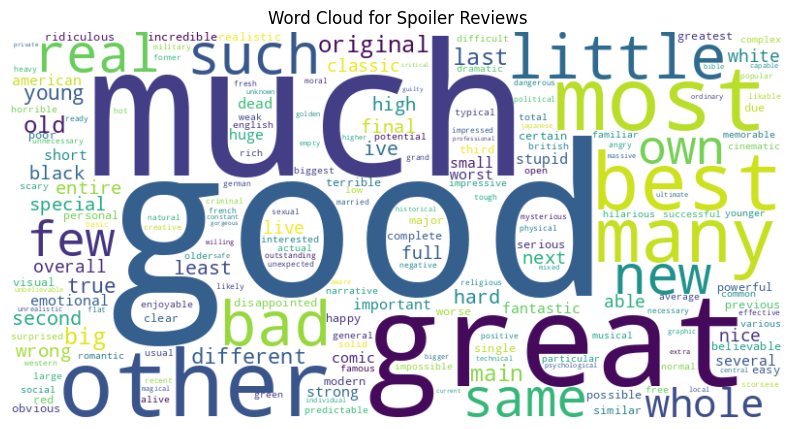

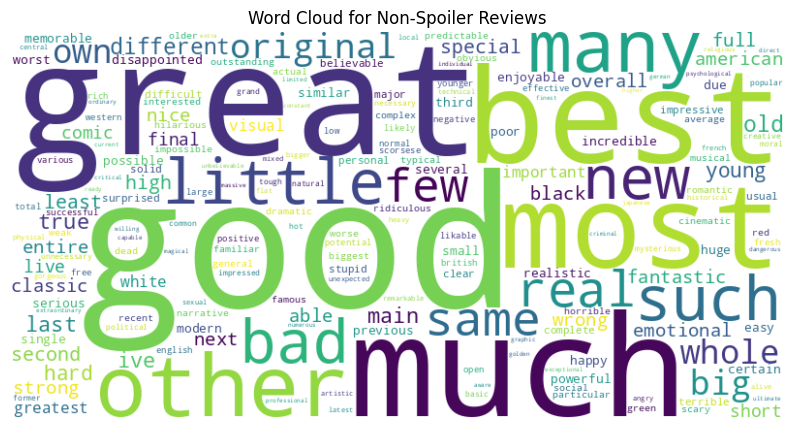

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to create a word cloud from a Counter object
def create_word_cloud(word_counts, title, save_filename=None):
    wordcloud = WordCloud(width=800, height=400, background_color="white", prefer_horizontal=1).generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Create word clouds for each Counter object
create_word_cloud(filtered_spoiler_word_counts, "Word Cloud for Spoiler Reviews")
create_word_cloud(filtered_non_spoiler_word_counts, "Word Cloud for Non-Spoiler Reviews")


In [ ]:
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import sentiwordnet as swn

def separate_words_by_sentiment(word_counts):
    pos_words = Counter()
    neg_words = Counter()
    for word, count in word_counts.items():
        synsets_list = list(swn.senti_synsets(word))  # Convert filter to a list
        if synsets_list:  # Check for non-empty list
            score = synsets_list[0].pos_score() - synsets_list[0].neg_score()
            if score > 0:
                pos_words[word] = count
            elif score < 0:
                neg_words[word] = count
    return pos_words, neg_words

# Example usage:
positive_spoiler_words, negative_spoiler_words = separate_words_by_sentiment(filtered_spoiler_word_counts)
positive_non_spoiler_words, negative_non_spoiler_words = separate_words_by_sentiment(filtered_non_spoiler_word_counts)

print("Positive Spoiler Words:", positive_spoiler_words)
print("Negative Spoiler Words:", negative_spoiler_words)
print("Positive Non-Spoiler Words:", positive_non_spoiler_words)
print("Negative Non-Spoiler Words:", negative_non_spoiler_words)

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Positive Spoiler Words: Counter({'good': 33105, 'best': 19029, 'new': 11309, 'big': 7987, 'different': 7244, 'true': 6255, 'high': 5020, 'able': 3930, 'classic': 3697, 'important': 3444, 'emotional': 3406, 'strong': 3383, 'fantastic': 3041, 'happy': 2638, 'due': 2597, 'greatest': 2572, 'powerful': 2438, 'serious': 2354, 'similar': 2257, 'clear': 2223, 'easy': 2212, 'obvious': 2160, 'believable': 1885, 'surprised': 1776, 'enjoyable': 1743, 'biggest': 1718, 'romantic': 1704, 'older': 1690, 'memorable': 1677, 'usual': 1625, 'impossible': 1592, 'dramatic': 1562, 'typical': 1534, 'impressive': 1515, 'famous': 1356, 'alive': 1344, 'interested': 1246, 'successful': 1214, 'outstanding': 1177, 'recent': 1154, 'mysterious': 1139, 'likely': 1130, 'sexual': 1124, 'effective': 1018, 'popular': 1006, 'bigger': 814, 'aware': 791, 'safe': 725, 'higher': 702, 'capable': 688, 'gorgeous': 681, 'private': 668, 'greater': 630, 'loose': 630, 'superior': 629, 'responsible': 592, 'significant': 584, 'extraord

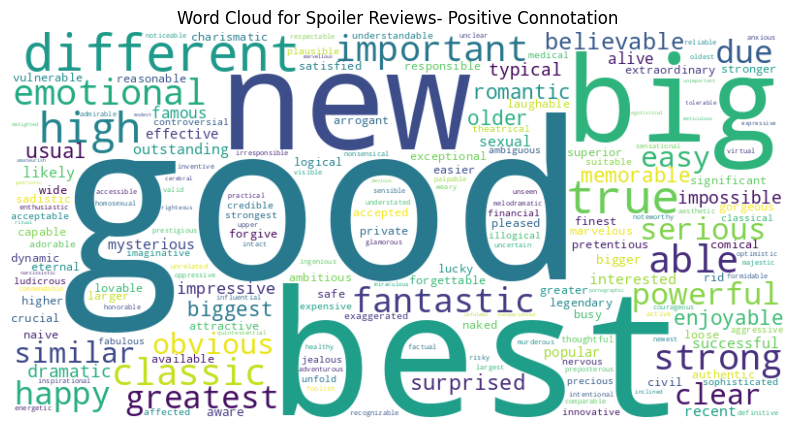

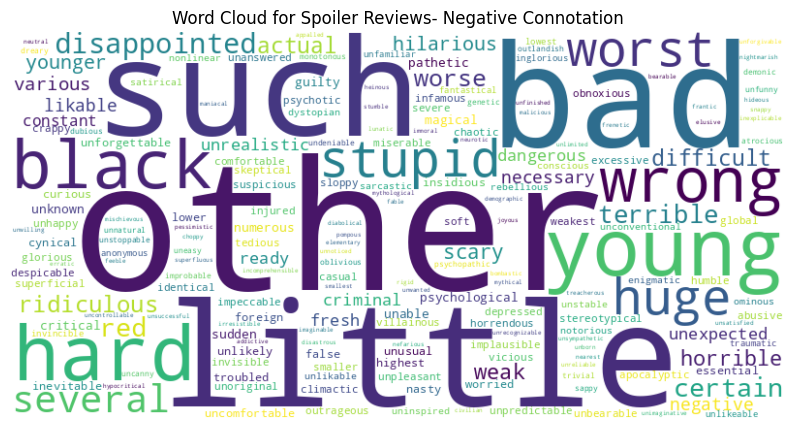

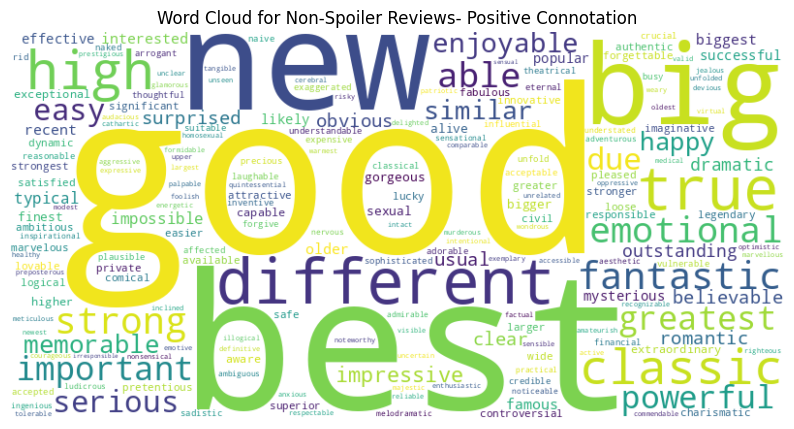

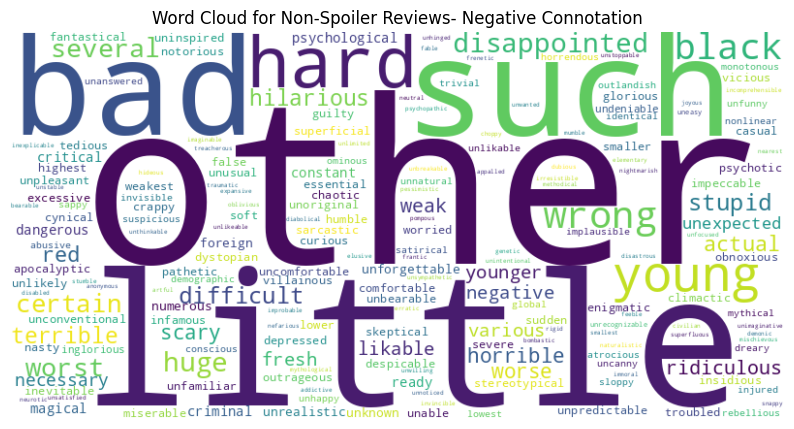

In [ ]:
create_word_cloud(positive_spoiler_words, "Word Cloud for Spoiler Reviews- Positive Connotation")
create_word_cloud(negative_spoiler_words, "Word Cloud for Spoiler Reviews- Negative Connotation")
create_word_cloud(positive_non_spoiler_words, "Word Cloud for Non-Spoiler Reviews- Positive Connotation")
create_word_cloud(negative_non_spoiler_words, "Word Cloud for Non-Spoiler Reviews- Negative Connotation")

In [ ]:
for word, count in positive_spoiler_words.most_common(10):
  print(f"{word}: {count}")
print('-------------------------------------')
for word, count in negative_spoiler_words.most_common(10):
  print(f"{word}: {count}")
print('-------------------------------------')
for word, count in positive_non_spoiler_words.most_common(10):
  print(f"{word}: {count}")
print('-------------------------------------')
for word, count in negative_non_spoiler_words.most_common(10):
  print(f"{word}: {count}")

good: 33105
best: 19029
new: 11309
big: 7987
different: 7244
true: 6255
high: 5020
able: 3930
classic: 3697
important: 3444
-------------------------------------
other: 22645
little: 13514
bad: 13344
such: 11852
young: 6300
hard: 5742
black: 4703
wrong: 4497
stupid: 2977
huge: 2864
-------------------------------------
good: 60146
best: 39489
new: 18569
big: 13517
different: 12649
true: 11286
high: 9046
classic: 7649
fantastic: 7000
strong: 6716
-------------------------------------
other: 34407
little: 21112
such: 20158
bad: 19344
hard: 10313
young: 10058
wrong: 6542
black: 5905
disappointed: 4706
huge: 4620


In [ ]:
filtered_reviews = movie_review[(movie_review['review_text'].str.contains('black')) & (movie_review['rating'] <= 5)]

# Extract the strings from the 'review_text' column
filtered_strings = filtered_reviews['review_text'].to_list()

# Print the extracted strings
print(f"Reviews with '{'black'}' and rating <= {5}:")
print(filtered_strings[1])

Reviews with 'black' and rating <= 5:
let me start out by stating the fact that i am a huge morgan freeman fan i absolutely adore most of his work however the shawshank redemption is the only exception as to just how far my love of morgan freeman will go first of all in the opening scene when morgan is getting rubbed down by two husky white men in the shower the hot water handle should be facing the left unless this film was shot in canada or utah i see no reason for this subtle inaccuracy second why did bruce willis decide to concentrate his fire strictly on the escapees of the prison why not on the inmates that were tucked safely in their cells finally the third and final problem that i had with this movie is this hadley is arrested for murder crying like a little girl as he is taken away while the warden decides to shoot his brains outwhile the others would talk about andys exploits red just listens one day he receives a blank postcard from the border knowing that his friend made it